In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

#### Test 1

In [8]:
dataset = pd.read_csv("G:\My Drive\Personal\portofolio projects\Dataco\DataCoSupplyChainDataset.csv\DataCoSupplyChainDataset.csv", sep=',', encoding='latin1')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [37]:
df_orderlist = dataset[["Order Id", "Customer Country", "Order Customer Id","Customer Fname", "Customer Lname","Order Status", "Days for shipping (real)", "Days for shipment (scheduled)","shipping date (DateOrders)", "Shipping Mode", "Late_delivery_risk", "Category Name", "Product Name", "Product Price","Order Item Quantity", "Order Item Total", "Market", "Order Country", "Order City"]]

In [38]:
df_orderlist.head()

,Order Id,Customer Country,Order Customer Id,Customer Fname,Customer Lname,Order Status,Days for shipping (real),Days for shipment (scheduled),shipping date (DateOrders),Shipping Mode,Late_delivery_risk,Category Name,Product Name,Product Price,Order Item Quantity,Order Item Total,Market,Order Country,Order City
0,77202,Puerto Rico,20755,Cally,Holloway,COMPLETE,3,4,2/3/2018 22:56,Standard Class,0,Sporting Goods,Smart watch,327.75,1,314.640015,Pacific Asia,Indonesia,Bekasi
1,75939,Puerto Rico,19492,Irene,Luna,PENDING,5,4,1/18/2018 12:27,Standard Class,1,Sporting Goods,Smart watch,327.75,1,311.359985,Pacific Asia,India,Bikaner
2,75938,EE. UU.,19491,Gillian,Maldonado,CLOSED,4,4,1/17/2018 12:06,Standard Class,0,Sporting Goods,Smart watch,327.75,1,309.720001,Pacific Asia,India,Bikaner
3,75937,EE. UU.,19490,Tana,Tate,COMPLETE,3,4,1/16/2018 11:45,Standard Class,0,Sporting Goods,Smart watch,327.75,1,304.809998,Pacific Asia,Australia,Townsville
4,75936,Puerto Rico,19489,Orli,Hendricks,PENDING_PAYMENT,2,4,1/15/2018 11:24,Standard Class,0,Sporting Goods,Smart watch,327.75,1,298.250000,Pacific Asia,Australia,Townsville


In [39]:
df_orderlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Order Id                       180519 non-null  int64  
 1   Customer Country               180519 non-null  object 
 2   Order Customer Id              180519 non-null  int64  
 3   Customer Fname                 180519 non-null  object 
 4   Customer Lname                 180511 non-null  object 
 5   Order Status                   180519 non-null  object 
 6   Days for shipping (real)       180519 non-null  int64  
 7   Days for shipment (scheduled)  180519 non-null  int64  
 8   shipping date (DateOrders)     180519 non-null  object 
 9   Shipping Mode                  180519 non-null  object 
 10  Late_delivery_risk             180519 non-null  int64  
 11  Category Name                  180519 non-null  object 
 12  Product Name                  

In [40]:
df_orderlist.isna().sum()

Order Id                         0
Customer Country                 0
Order Customer Id                0
Customer Fname                   0
Customer Lname                   8
Order Status                     0
Days for shipping (real)         0
Days for shipment (scheduled)    0
shipping date (DateOrders)       0
Shipping Mode                    0
Late_delivery_risk               0
Category Name                    0
Product Name                     0
Product Price                    0
Order Item Quantity              0
Order Item Total                 0
Market                           0
Order Country                    0
Order City                       0
dtype: int64

In [41]:
df_orderlist.duplicated().value_counts()

False    180519
Name: count, dtype: int64

In [42]:
df_orderlist["Customer Name"] = df_orderlist["Customer Fname"].astype(str) + " " + df_orderlist["Customer Lname"]
df_orderlist.drop(columns=["Customer Fname", "Customer Lname"], inplace=True)
df_orderlist.head()

C:\Users\azkar\AppData\Local\Temp\ipykernel_16940\2566564015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orderlist["Customer Name"] = df_orderlist["Customer Fname"].astype(str) + " " + df_orderlist["Customer Lname"]
C:\Users\azkar\AppData\Local\Temp\ipykernel_16940\2566564015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orderlist.drop(columns=["Customer Fname", "Customer Lname"], inplace=True)


,Order Id,Customer Country,Order Customer Id,Order Status,Days for shipping (real),Days for shipment (scheduled),shipping date (DateOrders),Shipping Mode,Late_delivery_risk,Category Name,Product Name,Product Price,Order Item Quantity,Order Item Total,Market,Order Country,Order City,Customer Name
0,77202,Puerto Rico,20755,COMPLETE,3,4,2/3/2018 22:56,Standard Class,0,Sporting Goods,Smart watch,327.75,1,314.640015,Pacific Asia,Indonesia,Bekasi,Cally Holloway
1,75939,Puerto Rico,19492,PENDING,5,4,1/18/2018 12:27,Standard Class,1,Sporting Goods,Smart watch,327.75,1,311.359985,Pacific Asia,India,Bikaner,Irene Luna
2,75938,EE. UU.,19491,CLOSED,4,4,1/17/2018 12:06,Standard Class,0,Sporting Goods,Smart watch,327.75,1,309.720001,Pacific Asia,India,Bikaner,Gillian Maldonado
3,75937,EE. UU.,19490,COMPLETE,3,4,1/16/2018 11:45,Standard Class,0,Sporting Goods,Smart watch,327.75,1,304.809998,Pacific Asia,Australia,Townsville,Tana Tate
4,75936,Puerto Rico,19489,PENDING_PAYMENT,2,4,1/15/2018 11:24,Standard Class,0,Sporting Goods,Smart watch,327.75,1,298.250000,Pacific Asia,Australia,Townsville,Orli Hendricks


In [54]:
df_orderlist=df_orderlist.rename(columns={"Days for shipping (real)": "Actual Shipping Days", 
                             "Days for shipment (scheduled)": "Scheduled Shipping Days",
                             "shipping date (DateOrders)": "Order Date",
                             "Order Customer Id": "Customer ID",
                             })
df_orderlist.head()

,Order Id,Customer Country,Customer ID,Order Status,Actual Shipping Days,Scheduled Shipping Days,Order Date,Shipping Mode,Late_delivery_risk,Category Name,Product Name,Product Price,Order Item Quantity,Order Item Total,Market,Order Country,Order City,Customer Name
0,77202,Puerto Rico,20755,COMPLETE,3,4,2/3/2018 22:56,Standard Class,0,Sporting Goods,Smart watch,327.75,1,314.640015,Pacific Asia,Indonesia,Bekasi,Cally Holloway
1,75939,Puerto Rico,19492,PENDING,5,4,1/18/2018 12:27,Standard Class,1,Sporting Goods,Smart watch,327.75,1,311.359985,Pacific Asia,India,Bikaner,Irene Luna
2,75938,EE. UU.,19491,CLOSED,4,4,1/17/2018 12:06,Standard Class,0,Sporting Goods,Smart watch,327.75,1,309.720001,Pacific Asia,India,Bikaner,Gillian Maldonado
3,75937,EE. UU.,19490,COMPLETE,3,4,1/16/2018 11:45,Standard Class,0,Sporting Goods,Smart watch,327.75,1,304.809998,Pacific Asia,Australia,Townsville,Tana Tate
4,75936,Puerto Rico,19489,PENDING_PAYMENT,2,4,1/15/2018 11:24,Standard Class,0,Sporting Goods,Smart watch,327.75,1,298.250000,Pacific Asia,Australia,Townsville,Orli Hendricks


In [ ]:
df_orderlist["Order Date"] = pd.to_datetime(df_orderlist["Order Date"])
df_orderlist["Shipping"] = pd.to_datetime(df_orderlist["Shipping Date"])


In [81]:
df_order_complete = df_orderlist[df_orderlist["Order Status"] == "COMPLETE"].copy()

In [82]:
df_order_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59491 entries, 0 to 180515
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order Id                 59491 non-null  int64         
 1   Customer Country         59491 non-null  object        
 2   Customer ID              59491 non-null  int64         
 3   Order Status             59491 non-null  object        
 4   Actual Shipping Days     59491 non-null  int64         
 5   Scheduled Shipping Days  59491 non-null  int64         
 6   Order Date               59491 non-null  datetime64[ns]
 7   Shipping Mode            59491 non-null  object        
 8   Late_delivery_risk       59491 non-null  int64         
 9   Category Name            59491 non-null  object        
 10  Product Name             59491 non-null  object        
 11  Product Price            59491 non-null  float64       
 12  Order Item Quantity      59491 non-n

In [84]:
numerical_features = [i for i in df_order_complete.columns if df_order_complete[i].dtypes!='O']
categorical_features = [j for j in df_order_complete.columns if df_order_complete[j].dtypes=='O']

print(numerical_features)
print(categorical_features)

['Order Id', 'Customer ID', 'Actual Shipping Days', 'Scheduled Shipping Days', 'Order Date', 'Late_delivery_risk', 'Product Price', 'Order Item Quantity', 'Order Item Total', 'Date Order']
['Customer Country', 'Order Status', 'Shipping Mode', 'Category Name', 'Product Name', 'Market', 'Order Country', 'Order City', 'Customer Name']


In [87]:
for feature in df_order_complete[categorical_features]:
    unique_values = df_order_complete[feature].unique()
    print(f"\nColumns : {feature}")
    print(f"Unique Values :\n{unique_values}")


Columns : Customer Country
Unique Values :
['Puerto Rico' 'EE. UU.']

Columns : Order Status
Unique Values :
['COMPLETE']

Columns : Shipping Mode
Unique Values :
['Standard Class' 'First Class' 'Second Class' 'Same Day']

Columns : Category Name
Unique Values :
['Sporting Goods' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' 'Baseball & Softball' 'Electronics'
 'Cardio Equipment' "Men's Footwear" 'Cleats' "Women's Clothing" 'Crafts'
 "Men's Clothing" "Women's Apparel" 'Shop By Sport' 'Accessories'
 'Trade-In' 'Hunting & Shooting' 'Fitness Accessories' 'As Seen on  TV!'
 'Strength Training' "Children's Clothing" 'Baby ' "Girls' Apparel"
 'Golf Balls' "Kids' Golf Clubs" 'Camping & Hiking' 'Fishing' 'Books '
 'DVDs' 'CDs ' 'Garden' 'Hockey' 'Pet Supplies' 'Health and Beauty'
 'Music' 'Video Games' 'Lacrosse' 'Tennis & Racquet' 'Boxing & MMA'
 'Golf Gloves' 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel'
 "Women's Golf Clubs" "Men's Golf Clubs" 'Toys' 'Water Sports'

#### Test 2

In [4]:
df = pd.read_csv("G:\My Drive\Personal\portofolio projects\Dataco\DataCoSupplyChainDataset.csv\DataCoSupplyChainDataset.csv", sep=',', encoding='latin1')

In [34]:
df[["Customer Country", "Order Country", "Customer City", "Order City", "Customer State", "Order State", "Customer Zipcode", "Order Item Id", "Product Card Id", "Sales per customer", "shipping date (DateOrders)" ]]

,Customer Country,Order Country,Customer City,Order City,Customer State,Order State,Customer Zipcode,Order Item Id,Product Card Id,Sales per customer,shipping date (DateOrders)
0,Puerto Rico,Indonesia,Caguas,Bekasi,PR,Java Occidental,725.0,180517,1360,314.640015,2/3/2018 22:56
1,Puerto Rico,India,Caguas,Bikaner,PR,Rajastán,725.0,179254,1360,311.359985,1/18/2018 12:27
2,EE. UU.,India,San Jose,Bikaner,CA,Rajastán,95125.0,179253,1360,309.720001,1/17/2018 12:06
3,EE. UU.,Australia,Los Angeles,Townsville,CA,Queensland,90027.0,179252,1360,304.809998,1/16/2018 11:45
4,Puerto Rico,Australia,Caguas,Townsville,PR,Queensland,725.0,179251,1360,298.250000,1/15/2018 11:24
...,...,...,...,...,...,...,...,...,...,...,...
180514,EE. UU.,China,Brooklyn,Shanghái,NY,Shanghái,11207.0,65177,1004,399.980011,1/20/2016 3:40
180515,EE. UU.,Japón,Bakersfield,Hirakata,CA,Osaka,93304.0,65161,1004,395.980011,1/19/2016 1:34
180516,EE. UU.,Australia,Bristol,Adelaide,CT,Australia del Sur,6010.0,65129,1004,391.980011,1/20/2016 21:00
180517,Puerto Rico,Australia,Caguas,Adelaide,PR,Australia del Sur,725.0,65126,1004,387.980011,1/18/2016 20:18


In [ ]:
df

In [3]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [ ]:
lat_lon = df[['Latitude', 'Longitude']].copy()

df = df.round(2)

df[['Latitude', 'Longitude']] = lat_lon


In [9]:
df = df.rename(columns = {
                             "Days for shipping (real)": "Actual Shipping Days", 
                             "Days for shipment (scheduled)": "Scheduled Shipping Days",
                             "order date (DateOrders)": "Order Date",
                             "shipping date (DateOrders)": "Shipping Date",
                             "Customer State": "Store State",
                             "Customer Street": "Store Street",
                             "Departmend Id": "Store Department Id",
                             "Department Name": "Store Department Name",
                             "Latitude": "Store Latitude",
                             "Longitude": "Store Longitude",
                             "Order Item Quantity": "Order Quantity",
                             "Order Item Total":"Order Total Price"
                             })

In [17]:
df["Customer Name"] = df["Customer Fname"].astype(str) + " " + df["Customer Lname"].astype(str)
df.drop(columns=["Customer Fname", "Customer Lname"], inplace=True)
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Id',
       'Customer Password', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Description', 'Product Image',
       'Produc

In [11]:
late_delivery_risk_map = {0: "Not Late", 1:"Late"}

df["Late_delivery_risk"] = df["Late_delivery_risk"].map(late_delivery_risk_map)

In [12]:
num_columns = [i for i in df.columns if df[i].dtype!='O']
cat_columns = [j for j in df.columns if df[j].dtype=="O"]

print(num_columns)
print(cat_columns)

['Actual Shipping Days', 'Scheduled Shipping Days', 'Benefit per order', 'Sales per customer', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Store Latitude', 'Store Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Quantity', 'Sales', 'Order Total Price', 'Order Profit Per Order', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Price', 'Product Status']
['Type', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Password', 'Customer Segment', 'Store State', 'Store Street', 'Store Department Name', 'Market', 'Order City', 'Order Country', 'Order Date', 'Order Region', 'Order State', 'Order Status', 'Product Image', 'Product Name', 'Shipping Date', 'Shipping Mode', 'Customer Name']


In [13]:
for column in df[cat_columns]:
    unique_values = df[column].unique()
    print(f"\nColumn : {column}")
    print(f"Unique Values : {unique_values}")


Column : Type
Unique Values : ['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']

Column : Delivery Status
Unique Values : ['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']

Column : Late_delivery_risk
Unique Values : ['Not Late' 'Late']

Column : Category Name
Unique Values : ['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Type                      180519 non-null  object 
 1   Actual Shipping Days      180519 non-null  int64  
 2   Scheduled Shipping Days   180519 non-null  int64  
 3   Benefit per order         180519 non-null  float64
 4   Sales per customer        180519 non-null  float64
 5   Delivery Status           180519 non-null  object 
 6   Late_delivery_risk        180519 non-null  object 
 7   Category Id               180519 non-null  int64  
 8   Category Name             180519 non-null  object 
 9   Customer City             180519 non-null  object 
 10  Customer Country          180519 non-null  object 
 11  Customer Email            180519 non-null  object 
 12  Customer Id               180519 non-null  int64  
 13  Customer Password         180519 non-null  o

In [19]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Shipping Date"] = pd.to_datetime(df["Shipping Date"])


In [20]:
df.isna().sum()

Type                             0
Actual Shipping Days             0
Scheduled Shipping Days          0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Id                      0
Customer Password                0
Customer Segment                 0
Store State                      0
Store Street                     0
Customer Zipcode                 3
Department Id                    0
Store Department Name            0
Store Latitude                   0
Store Longitude                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
Order Date                       0
Order Id                         0
Order Item Cardprod 

In [21]:
df.isnull().sum()

Type                             0
Actual Shipping Days             0
Scheduled Shipping Days          0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Id                      0
Customer Password                0
Customer Segment                 0
Store State                      0
Store Street                     0
Customer Zipcode                 3
Department Id                    0
Store Department Name            0
Store Latitude                   0
Store Longitude                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
Order Date                       0
Order Id                         0
Order Item Cardprod 

In [32]:
col_hash = {col: pd.util.hash_pandas_object(df[col], index=False).sum() for col in df.columns}

dupes = []
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns[i+1:], i+1):
        if col_hash[col1] == col_hash[col2] and (df[col1] == df[col2]).all():
            dupes.append((col1, col2))

dupes


[('Benefit per order', 'Order Profit Per Order'),
 ('Sales per customer', 'Order Item Total'),
 ('Category Id', 'Product Category Id'),
 ('Customer Email', 'Customer Password'),
 ('Customer Id', 'Order Customer Id'),
 ('Order Item Cardprod Id', 'Product Card Id'),
 ('Order Item Product Price', 'Product Price')]

In [23]:
df = df.drop(columns=["Order Zipcode", 
                      "Product Description", 
                      "Order Customer Id", 
                      "Order Item Cardprod Id", 
                      "Order Item Product Price", 
                      "Benefit per order", 
                      "Sales per customer", 
                      "Customer Email", 
                      "Customer Password"])

In [24]:
df.duplicated().sum()

0

In [25]:
df = df.sort_values(by="Order Date")
df.head()

,Type,Actual Shipping Days,Scheduled Shipping Days,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,Shipping Date,Shipping Mode,Customer Name
33833,CASH,2,4,Advance shipping,Not Late,43,Camping & Hiking,Hickory,EE. UU.,11599,...,CLOSED,957,43,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.98,0,2015-01-03 00:00:00,Standard Class,Mary Malone
77011,PAYMENT,3,4,Advance shipping,Not Late,48,Water Sports,Chicago,EE. UU.,256,...,PENDING_PAYMENT,1073,48,http://images.acmesports.sports/Pelican+Sunstr...,Pelican Sunstream 100 Kayak,199.99,0,2015-01-04 00:21:00,Standard Class,David Rodriguez
109322,PAYMENT,3,4,Advance shipping,Not Late,24,Women's Apparel,Chicago,EE. UU.,256,...,PENDING_PAYMENT,502,24,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.00,0,2015-01-04 00:21:00,Standard Class,David Rodriguez
87884,PAYMENT,3,4,Advance shipping,Not Late,18,Men's Footwear,Chicago,EE. UU.,256,...,PENDING_PAYMENT,403,18,http://images.acmesports.sports/Nike+Men%27s+C...,Nike Men's CJ Elite 2 TD Football Cleat,129.99,0,2015-01-04 00:21:00,Standard Class,David Rodriguez
114915,CASH,5,4,Late delivery,Late,46,Indoor/Outdoor Games,San Antonio,EE. UU.,8827,...,CLOSED,1014,46,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.98,0,2015-01-06 01:03:00,Standard Class,Brian Wilson


In [ ]:
df["Actual Shipping Days"].value_counts()

Actual Shipping Days
2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: count, dtype: int64

In [ ]:
df["Scheduled Shipping Days"].value_counts()

Scheduled Shipping Days
4    107752
2     35216
1     27814
0      9737
Name: count, dtype: int64

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['type', 'actual_shipping_days', 'scheduled_shipping_days',
       'delivery_status', 'late_delivery_risk', 'category_id', 'category_name',
       'customer_city', 'customer_country', 'customer_id', 'customer_segment',
       'store_state', 'store_street', 'customer_zipcode', 'department_id',
       'store_department_name', 'store_latitude', 'store_longitude', 'market',
       'order_city', 'order_country', 'order_date', 'order_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_profit_ratio', 'order_quantity', 'sales',
       'order_total_price', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_image', 'product_name', 'product_price', 'product_status',
       'shipping_date', 'shipping_mode', 'customer_name'],
      dtype='object')

In [ ]:
df[["order_profit_per_order", "order_total_price","order_item_profit_ratio"]]

,order_profit_per_order,order_total_price,order_item_profit_ratio
33833,88.79,239.98,0.37
77011,91.18,193.99,0.47
109322,68.25,227.50,0.30
87884,36.47,107.89,0.34
114915,33.59,159.94,0.21
...,...,...,...
160537,-107.96,161.87,-0.67
93905,-126.56,172.66,-0.73
0,91.25,314.64,0.29
52147,1.53,10.91,0.14


In [ ]:
df["delivery_delay"] = df["actual_shipping_days"].values - df["scheduled_shipping_days"].values
df[["delivery_delay", "actual_shipping_days", "scheduled_shipping_days"]]

,delivery_delay,actual_shipping_days,scheduled_shipping_days
33833,-2,2,4
77011,-1,3,4
109322,-1,3,4
87884,-1,3,4
114915,1,5,4
...,...,...,...
160537,2,6,4
93905,-2,2,4
0,-1,3,4
52147,0,4,4


### EDA

#### Shipping

In [36]:
df_complete_only = df[df["order_status"].isin(["COMPLETE", "PENDING", "CLOSED"])].copy()

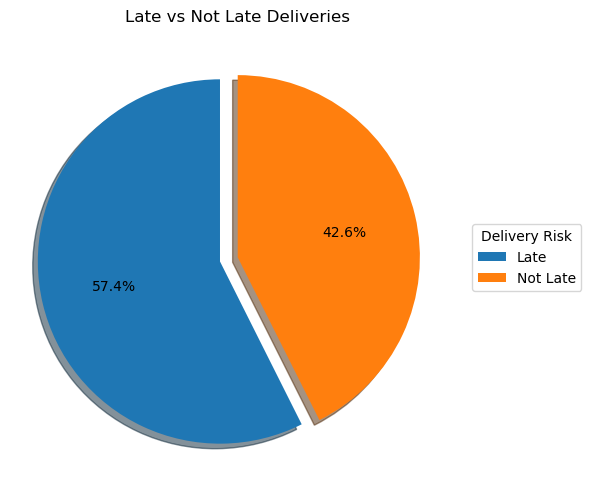

In [37]:
late_notlate_count = df_complete_only["late_delivery_risk"].value_counts()
myexplode = [0.1, 0]

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    late_notlate_count,
    autopct='%1.1f%%',
    explode=myexplode,
    shadow=True,
    startangle=90
)
ax.legend(wedges, late_notlate_count.index, title="Delivery Risk", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Late vs Not Late Deliveries")
plt.tight_layout()
plt.show()


plt.show()

In [38]:
df_complete_only["delivery_delay"]

33833    -2
114915    1
95938     1
63764     1
96131     1
         ..
142093    1
62641     1
93905    -2
0        -1
17863     1
Name: delivery_delay, Length: 99334, dtype: int64

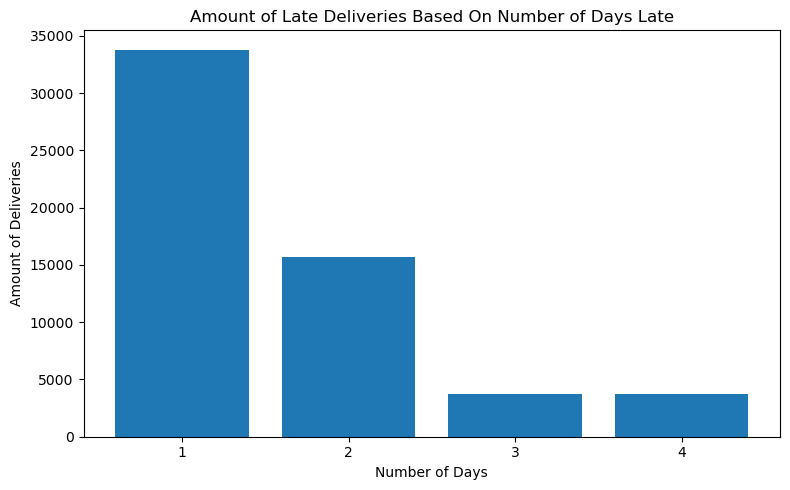

In [39]:
days_late = (df_complete_only[df_complete_only["delivery_delay"] > 0]["delivery_delay"].astype(int).value_counts().sort_index())

plt.figure(figsize=(8,5))
plt.bar(days_late.index, days_late.values,)
plt.title('Amount of Late Deliveries Based On Number of Days Late')
plt.xlabel('Number of Days')
plt.ylabel('Amount of Deliveries')
plt.xticks(days_late.index)
plt.tight_layout()
plt.show()


C:\Users\azkar\AppData\Local\Temp\ipykernel_13732\1772112049.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_delays = df_late[df["delivery_delay"]>0]


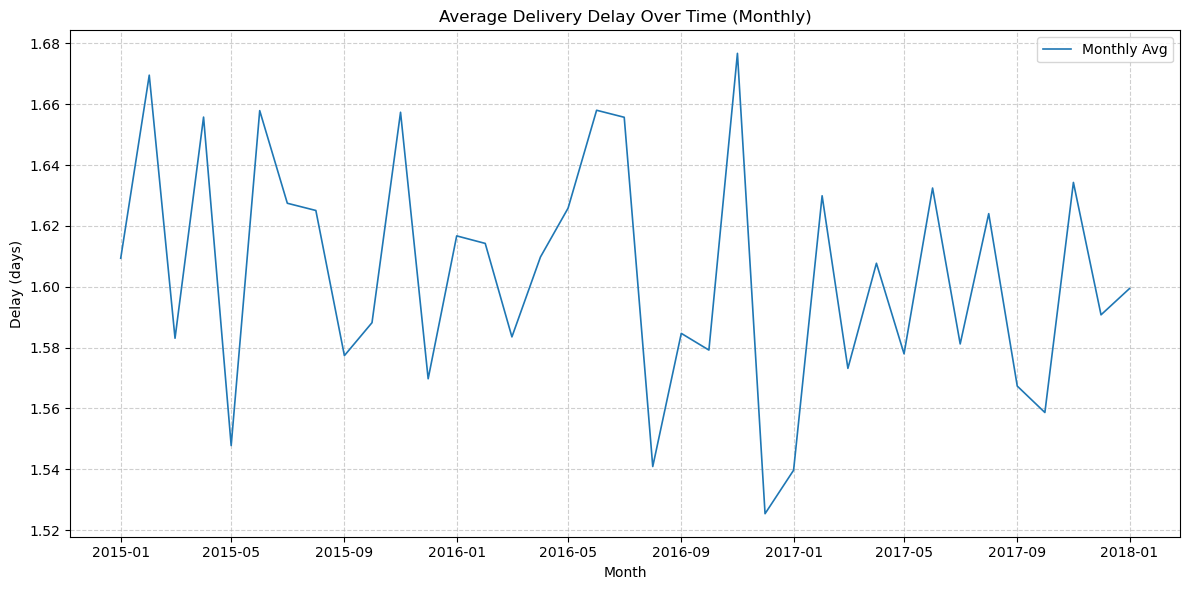

In [40]:
df_complete_only['shipping_date'].max()
df_complete_only['shipping_date'].min()

last_month = df_complete_only['shipping_date'].dt.to_period('M').max()
df_late = df_complete_only[df_complete_only['shipping_date'].dt.to_period('M') < last_month]

df_delays = df_late[df["delivery_delay"]>0]

monthly = (
    df_delays.resample('MS', on='shipping_date')["delivery_delay"]
      .mean()
      .rename('avg_delay_days')
      .to_frame()
)

plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly['avg_delay_days'], linewidth=1.2, label='Monthly Avg')
plt.title('Average Delivery Delay Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Delay (days)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

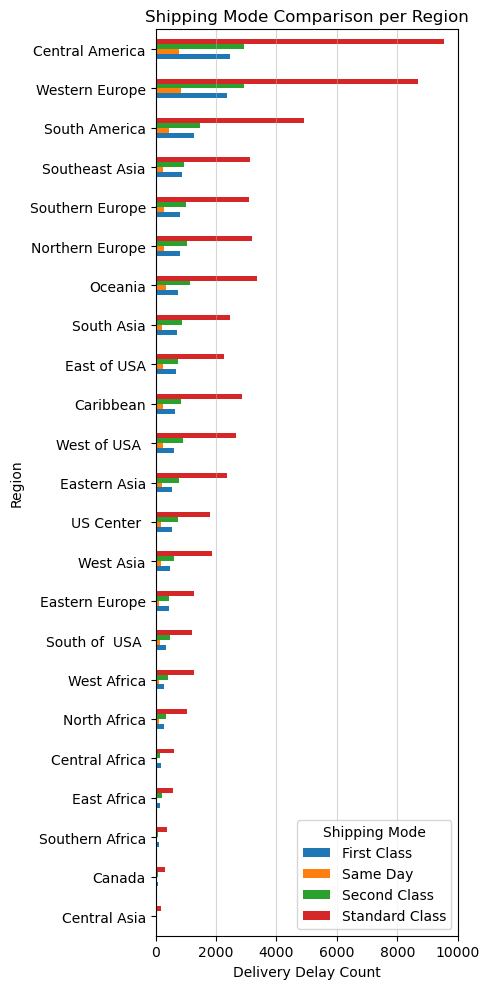

In [41]:
regional_mode_shipping = df_complete_only.groupby(['order_region', 'shipping_mode'])['delivery_delay'].size().reset_index() 

pivoted = regional_mode_shipping.pivot(index='order_region', columns='shipping_mode', values='delivery_delay')
pivoted = pivoted.sort_values(by=list(pivoted.columns), ascending=True)

pivoted.plot(kind='barh', figsize=(5,10))
plt.title('Shipping Mode Comparison per Region')
plt.ylabel('Region')
plt.xlabel('Delivery Delay Count')
plt.xticks(rotation=0)
plt.grid(axis='x', linestyle='-', alpha=0.5)
plt.legend(title=('Shipping Mode'))
plt.tight_layout()
plt.show()

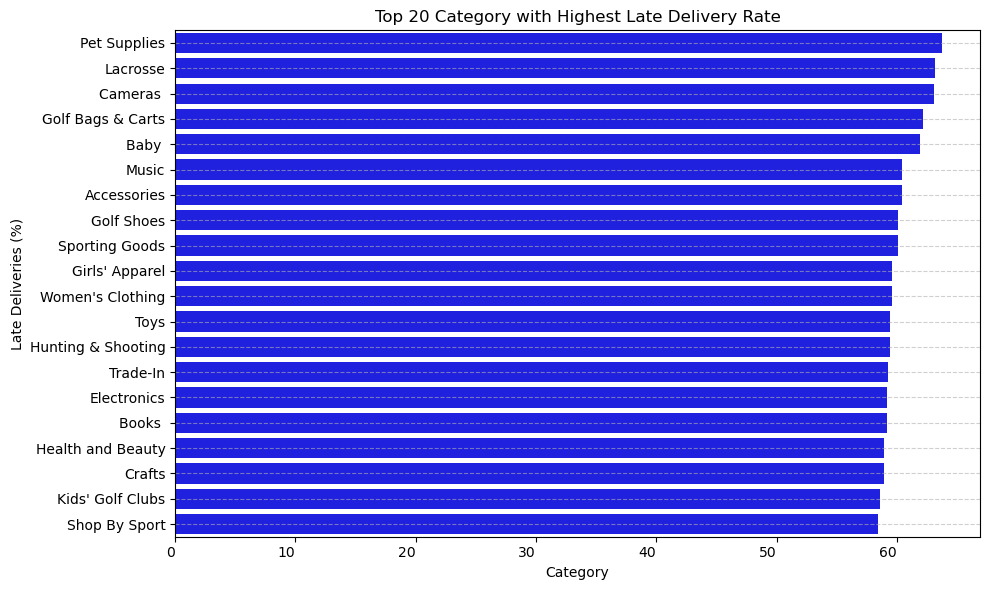

In [42]:
cat_perf = (
    df_complete_only
      .groupby('category_name')['delivery_delay']
      .apply(lambda x: (x > 0).mean() * 100)
      .reset_index(name='late_rate')
)

top10 = cat_perf.sort_values('late_rate', ascending=False).head(20)


plt.figure(figsize=(10,6))
sns.barplot(
    data=top10,
    x='late_rate', y='category_name', color='blue'
)
plt.title('Top 20 Category with Highest Late Delivery Rate')
plt.xlabel('Category')
plt.ylabel('Late Deliveries (%)')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


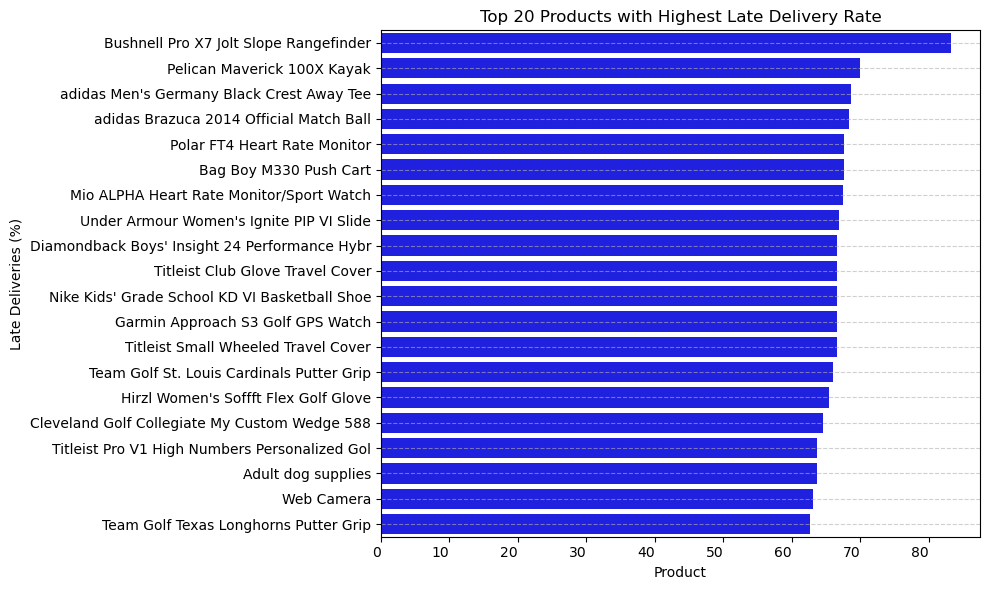

In [43]:
product_perf = (
    df_complete_only
      .groupby('product_name')['delivery_delay']
      .apply(lambda x: (x > 0).mean() * 100)
      .reset_index(name='late_rate')
)

top10 = product_perf.sort_values('late_rate', ascending=False).head(20)


plt.figure(figsize=(10,6))
sns.barplot(
    data=top10,
    x='late_rate', y='product_name', color='blue'
)
plt.title('Top 20 Products with Highest Late Delivery Rate')
plt.xlabel('Product')
plt.ylabel('Late Deliveries (%)')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Sales

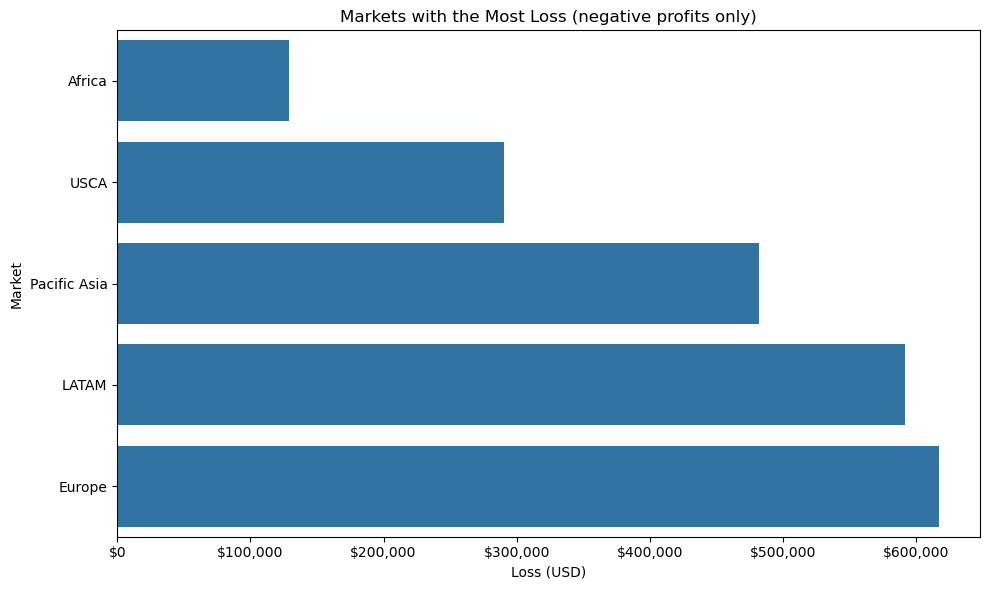

In [45]:
loss_by_market = (
    df_complete_only.loc[df_complete_only["order_profit_per_order"] < 0, ["market", "order_profit_per_order"]]
      .assign(loss=lambda d: d["order_profit_per_order"].abs())
      .groupby("market", as_index=False)["loss"]
      .sum()
      .sort_values("loss", ascending=True)
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=loss_by_market, y="market", x="loss", color="#1f77b4")
ax.set_title("Markets with the Most Loss (negative profits only)")
ax.set_xlabel("Loss (USD)")
ax.set_ylabel("Market")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${x:,.0f}"))
plt.tight_layout()
plt.show()


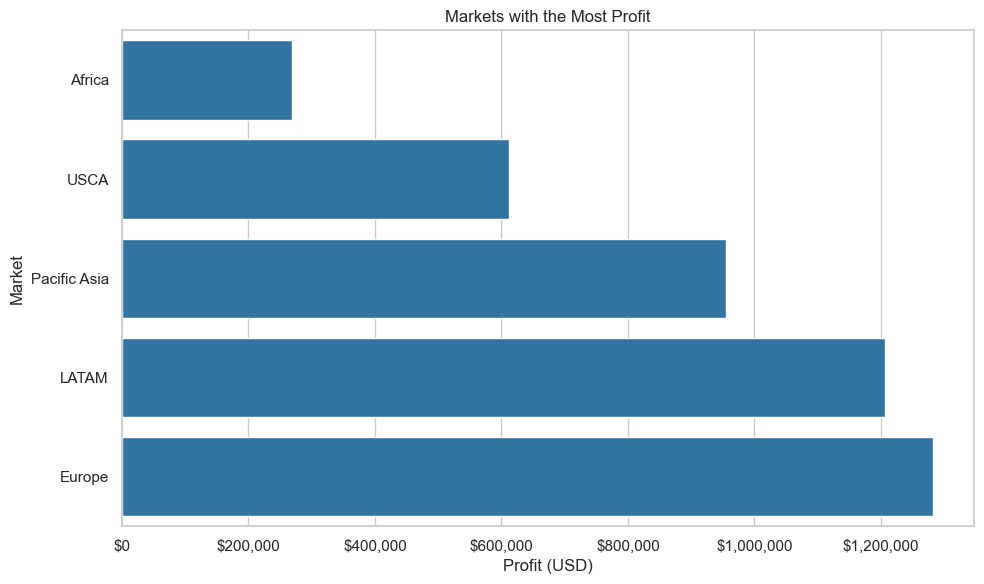

In [46]:
sns.set_theme(style="whitegrid")

profit_by_market = (
    df_complete_only.loc[df_complete_only["order_profit_per_order"] > 0, ["market", "order_profit_per_order"]]
      .groupby("market", as_index=False)["order_profit_per_order"]
      .sum()
      .rename(columns={"order_profit_per_order": "total_profit"})
      .sort_values("total_profit", ascending=True)
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=profit_by_market, y="market", x="total_profit", color="#1f77b4")
ax.set_title("Markets with the Most Profit")
ax.set_xlabel("Profit (USD)")
ax.set_ylabel("Market")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${x:,.0f}"))
plt.tight_layout()
plt.show()

In [47]:
df_complete_only[df_complete_only["category_name"] == "Fishing"]["order_profit_per_order"]

93110    -121.84
63000       0.00
157819    176.39
110042     47.32
159776     63.24
           ...  
114925    119.99
114923    -37.51
114922    131.03
114919     30.97
114916    126.47
Name: order_profit_per_order, Length: 9485, dtype: float64

In [48]:
      
df_complete_only[df_complete_only["category_name"] == "Fishing"].groupby("category_name", as_index=False)["order_profit_per_order"].sum()

,category_name,order_profit_per_order
0,Fishing,412539.03


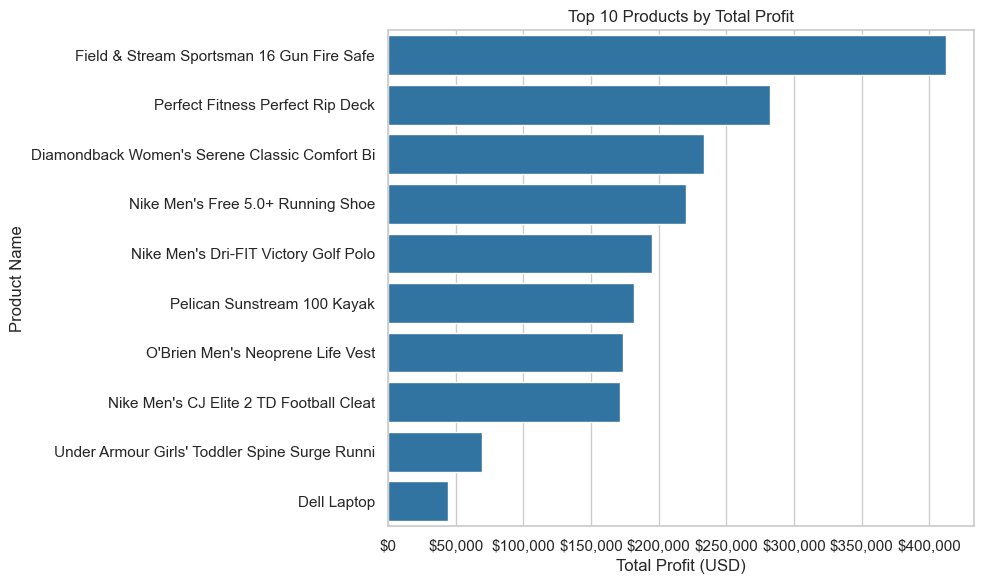

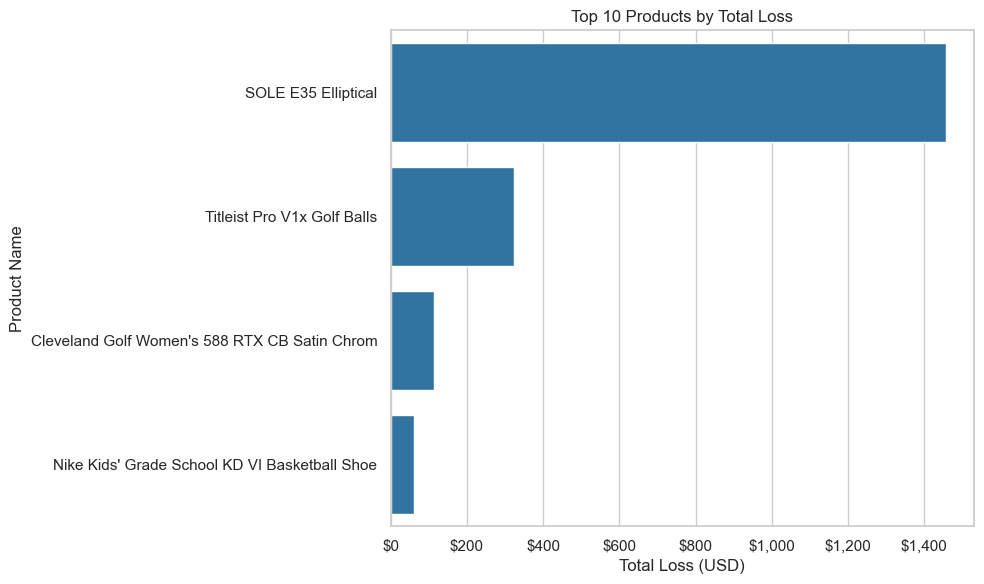

In [49]:


sns.set_theme(style="whitegrid")

product_profit = (
    df_complete_only.loc[:, ["product_name", "order_profit_per_order"]]
      .groupby("product_name", as_index=False)["order_profit_per_order"].sum()
      .rename(columns={"order_profit_per_order": "total_profit"})
)

top_profit = (
    product_profit
      .loc[product_profit["total_profit"] > 0]
      .nlargest(10, "total_profit")
)

top_loss = (
    product_profit
      .loc[product_profit["total_profit"] < 0]
      .nsmallest(10, "total_profit")        
      .assign(total_loss=lambda d: -d["total_profit"])  
)


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_profit, y="product_name", x="total_profit", color='#1f77b4')
ax.set_title("Top 10 Products by Total Profit")
ax.set_xlabel("Total Profit (USD)")
ax.set_ylabel("Product Name")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${x:,.0f}"))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_loss, y="product_name", x="total_loss", color='#1f77b4')
ax.set_title("Top 10 Products by Total Loss")
ax.set_xlabel("Total Loss (USD)")
ax.set_ylabel("Product Name")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${x:,.0f}"))
plt.tight_layout()
plt.show()


In [50]:
status_order = [
    "COMPLETE","PENDING","CLOSED","PENDING_PAYMENT","CANCELED",
    "PROCESSING","SUSPECTED_FRAUD","ON_HOLD","PAYMENT_REVIEW"
]

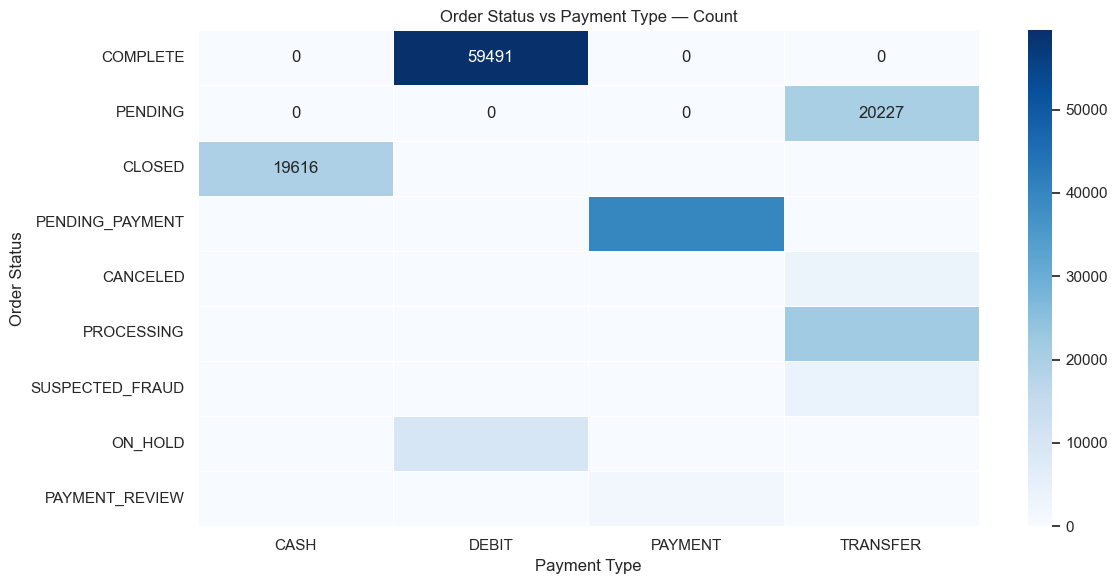

In [51]:
ct = pd.crosstab(
    index=pd.Categorical(df["order_status"], categories=status_order, ordered=True),
    columns=df["type"]
).fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(ct, annot=True, fmt=".0f", linewidths=.5, cmap="Blues")
plt.title("Order Status vs Payment Type — Count")
plt.xlabel("Payment Type")
plt.ylabel("Order Status")
plt.tight_layout()
plt.show()


c:\Users\azkar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\azkar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\azkar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

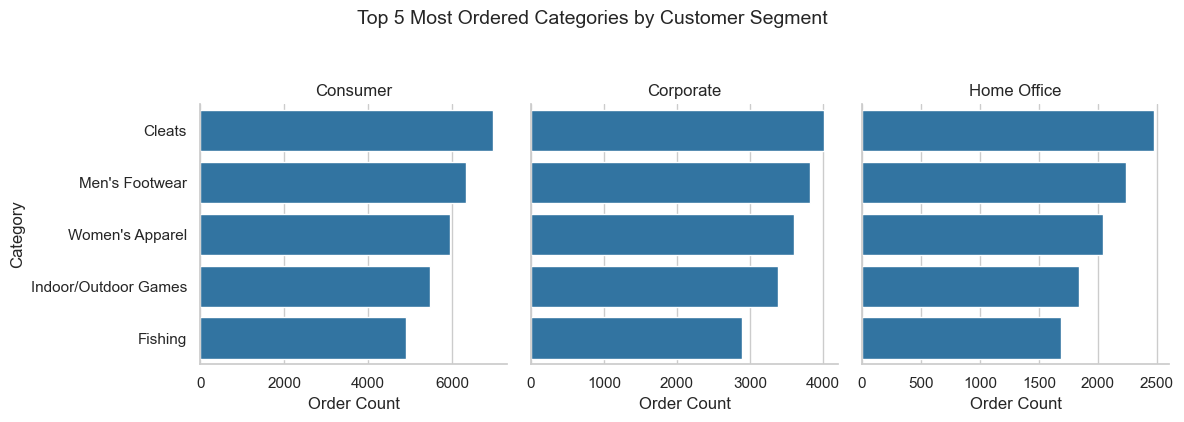

In [52]:
category_orders = (
    df_complete_only.groupby(["customer_segment", "category_name"])
      .size()
      .reset_index(name="order_count")
)

top5_per_segment = (
    category_orders
    .sort_values(["customer_segment", "order_count"], ascending=[True, False])
    .groupby("customer_segment", as_index=False)
    .head(5)
)

top5_per_segment["category_name"] = top5_per_segment.groupby("customer_segment")["category_name"].transform(
    lambda x: pd.Categorical(x, categories=x.iloc[np.argsort(-top5_per_segment.loc[x.index, "order_count"])], ordered=True)
)

g = sns.catplot(
    data=top5_per_segment,
    kind="bar",
    x="order_count",
    y="category_name",
    col="customer_segment",
    sharex=False,
    height=4,
    aspect=1,
    color='#1f77b4'
)

g.set_axis_labels("Order Count", "Category")
g.set_titles("{col_name}")
g.fig.suptitle("Top 5 Most Ordered Categories by Customer Segment", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


In [53]:
category_orders = (
    df_complete_only.groupby(["customer_segment", "category_name"])
      .size()
      .reset_index(name="order_count")
)

top10_per_segment = (
    category_orders
    .sort_values(["customer_segment", "order_count"], ascending=[True, False])
    .groupby("customer_segment", as_index=False)
    .head(10)
)

for segment in top10_per_segment["customer_segment"].unique():
    print(f"\n{'='*40}")
    print(f"Top 10 Categories — {segment}")
    print(f"{'='*40}")
    display(
        top10_per_segment[top10_per_segment["customer_segment"] == segment]
        .sort_values("order_count", ascending=False)
        .reset_index(drop=True)
    )



Top 10 Categories — Consumer


,customer_segment,category_name,order_count
0,Consumer,Cleats,6970
1,Consumer,Men's Footwear,6325
2,Consumer,Women's Apparel,5965
3,Consumer,Indoor/Outdoor Games,5473
4,Consumer,Fishing,4899
5,Consumer,Water Sports,4328
6,Consumer,Camping & Hiking,3856
7,Consumer,Cardio Equipment,3560
8,Consumer,Shop By Sport,3146
9,Consumer,Electronics,910



Top 10 Categories — Corporate


,customer_segment,category_name,order_count
0,Corporate,Cleats,4010
1,Corporate,Men's Footwear,3818
2,Corporate,Women's Apparel,3603
3,Corporate,Indoor/Outdoor Games,3379
4,Corporate,Fishing,2896
5,Corporate,Water Sports,2600
6,Corporate,Camping & Hiking,2362
7,Corporate,Cardio Equipment,2142
8,Corporate,Shop By Sport,1823
9,Corporate,Electronics,501



Top 10 Categories — Home Office


,customer_segment,category_name,order_count
0,Home Office,Cleats,2478
1,Home Office,Men's Footwear,2233
2,Home Office,Women's Apparel,2041
3,Home Office,Indoor/Outdoor Games,1840
4,Home Office,Fishing,1690
5,Home Office,Water Sports,1466
6,Home Office,Camping & Hiking,1336
7,Home Office,Cardio Equipment,1213
8,Home Office,Shop By Sport,1025
9,Home Office,Electronics,291


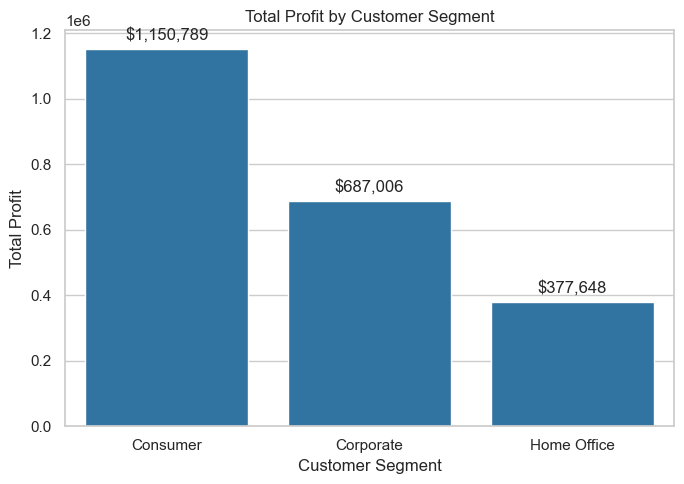

,customer_segment,total_profit
0,Consumer,1150789.05
1,Corporate,687005.52
2,Home Office,377648.12


In [54]:
profit_by_segment = (
    df_complete_only.dropna(subset=["order_profit_per_order"])
      .groupby("customer_segment", as_index=False)["order_profit_per_order"]
      .sum()
      .rename(columns={"order_profit_per_order":"total_profit"})
      .sort_values("total_profit", ascending=False)
)

plt.figure(figsize=(7,5))
ax = sns.barplot(data=profit_by_segment, x="customer_segment", y="total_profit", color='#1f77b4')
ax.set_title("Total Profit by Customer Segment")
ax.set_xlabel("Customer Segment")
ax.set_ylabel("Total Profit")

for p in ax.patches:
    value = p.get_height()
    ax.annotate(f"${value:,.0f}", (p.get_x() + p.get_width()/2, value),
                ha="center", va="bottom", xytext=(0,5), textcoords="offset points")

plt.tight_layout()
plt.show()

display(profit_by_segment.reset_index(drop=True))


,order_region,total_orders,late_orders,late_rate(%)
2,Central Africa,1677,972,57.960644
13,South Asia,7731,4350,56.266977
5,East Africa,1852,1036,55.939525
22,Western Europe,27109,15140,55.848611
14,South of USA,4045,2256,55.772559
8,Eastern Europe,3920,2182,55.663265
6,East of USA,6915,3849,55.661605
15,Southeast Asia,9539,5297,55.529930
4,Central Asia,553,306,55.334539
20,West Asia,6009,3322,55.283741


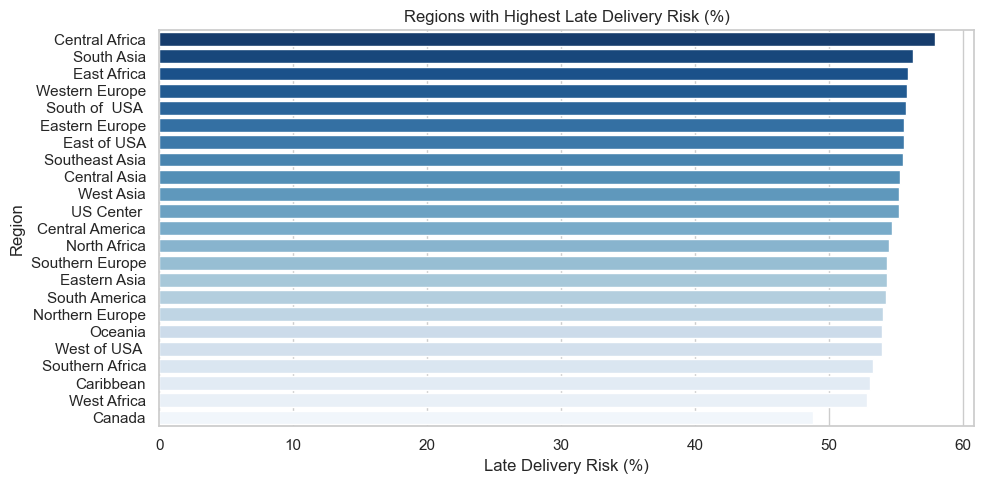

In [57]:
fraud_by_region = (
    df.groupby("order_region", dropna=False)
      .agg(
          total_orders=("order_id", "count"),
          late_orders=("late_delivery_risk", lambda x: (x == "Late").sum())
      )
      .reset_index()
)

fraud_by_region["late_rate(%)"] = (fraud_by_region["late_orders"] / fraud_by_region["total_orders"]) * 100

fraud_by_region = fraud_by_region.sort_values("late_rate(%)", ascending=False)

display(fraud_by_region)

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=fraud_by_region,
    x="late_rate(%)", y="order_region",
    
    palette="Blues_r"
)
ax.set_title("Regions with Highest Late Delivery Risk (%)")
ax.set_ylabel("Region")
ax.set_xlabel("Late Delivery Risk (%)")

plt.tight_layout()
plt.show()
